In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
dbFile = 'baseline_v1.4_10yrs.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
bundleList = []
sql = 'filter="g"'
metric = metrics.PassMetric(cols=['ra_dcr_amp', 'dec_dcr_amp', 'PA', 'airmass'])
slicer = slicers.UserPointsSlicer(ra=[0.], dec=[-30.])
plotDict = {'colorMax': 27.4}
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict))

In [4]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()


Querying database SummaryAllProps with constraint filter="g" for columns ['altitude', 'fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'airmass', 'observationStartLST']
Found 209798 visits
Running:  ['opsim_Pass_ra_dcr_amp_dec_dcr_amp_PA_airmass_g_USER']


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/stackers/baseStacker.py:127: UserWarning: Warning - column PA already present in simData, may be overwritten (depending on stacker).
  % (col))


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [5]:
mv = bundleList[0].metricValues[0]

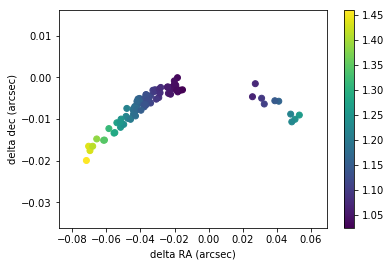

In [6]:
plt.scatter(mv['ra_dcr_amp'], mv['dec_dcr_amp'], c=mv['airmass'])
plt.xlabel('delta RA (arcsec)')
plt.ylabel('delta dec (arcsec)')
cb = plt.colorbar()

# Ah, the spread here is because it's computing it for the center of each pointing that overlaps this point. 

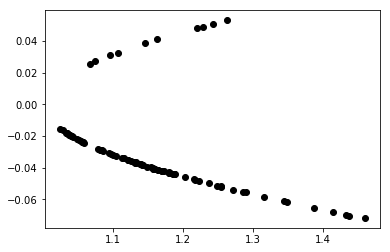

In [7]:
plt.plot(mv['airmass'],mv['ra_dcr_amp'],  'ko')

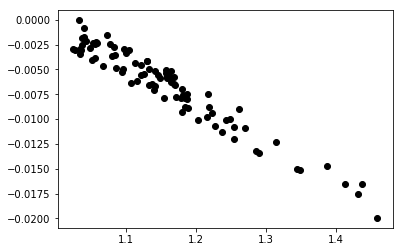

In [8]:
plt.plot(mv['airmass'],mv['dec_dcr_amp'],  'ko')